# Trabajo Especial - Modelos y Simulación 2025
### Lucas Nieto y Alvaro Santiago Medina
---

# Problema

Se desea estimar mediante simulación estocástica la siguiente integral definida sobre el hipercubo $[0,1]^d$, donde $d=2,5,10$:
$$
I_d = \int_{[0,1]^d} \prod_{i=1}^d e^{-x_i^2}dx
$$

Como la integral es separable y tiene un valor exacto conocido, viene dado por:
$$
I_d = \bigg( \int_0^1 e^{-x_i^2}dx \bigg)^d = \bigg(\frac{\sqrt{\pi}}{2} \cdot erf(1)\bigg)
$$

Donde *erf* es la función error valuada en 1. Tal que:
$$
erf(1) = \frac{2}{\sqrt{\pi}}\int_0^1 e^{-t^2}dt \approx 0.8427
$$

Luego el valor de $I_d$ es tal que:
$$
I_d = \bigg(\frac{\sqrt{\pi}}{2} \cdot erf(1)\bigg) = \bigg(\frac{\sqrt{\pi}}{2} \cdot 0.8427 \bigg) = \boxed{0.74682}
$$

Para realizar la estimación se utilizará *Monte Carlo* con un número fijo de estimaciones.

Como Monte Carlo requiere de un generador de muestras uniformes en el $(0,1)$ se utilizarán los siguientes generadores:
- **Congruencial Lineal Mixto con parámetro**s $(a, c, m) = (16807, 0, 2^{31}-1)$
- **XORshift** 
- **Mersenne Twister** (MT19937)

Dichas implementaciones para los generadores podemos encontrarlas en la carpeta 📁`rngs/`

# Importaciones Generales

In [2]:
#%matplotlib widget <- Descomentar para poder maniobrar las figuras 3D
from constants import *
from MonteCarlo import MonteCarlo
from Utils import Utils
from rngs.Xorshift32 import Xorshift
from rngs.MersenneTwister import MersenneTwister
from rngs.LCG import LCG
from time import time

# Generadores

A través de la implementación de cada generador, analizaremos si los mismos caen en el problema de los *"Hiperplanos"*

## Semilla

Para que los resultados sean comparables seteamos una semilla general

In [3]:
SEED = int(time())

## Instancias

Generamos una instancia de para la clase de *Generador Congruencial Lineal, Xorshift y Mersenne Twister*  con la `seed` general

In [4]:
lcg = LCG(seed=SEED)
xorshift  = Xorshift(seed=SEED)
mersenne_twister = MersenneTwister(seed_value=SEED)

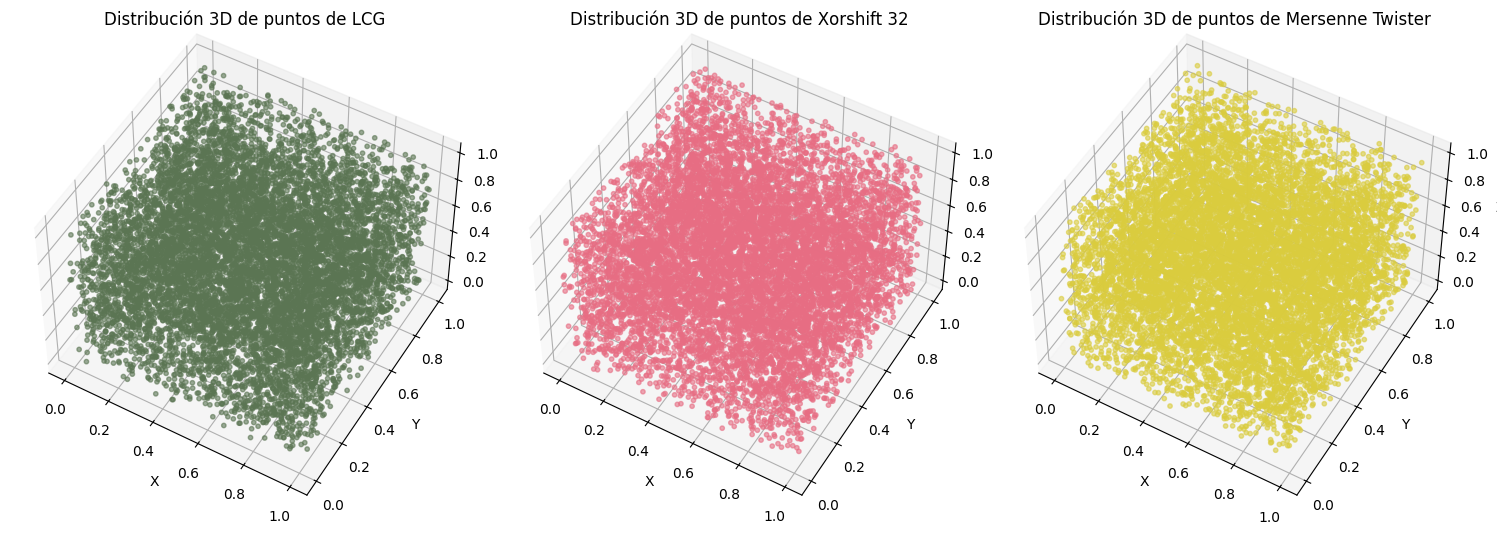

In [5]:
Utils.plot_3D_generators(generators=[lcg, xorshift, mersenne_twister], Nsamples=SAMPLE_SIZE_SMALL)

Seguido de esto realizamos las estimaciones de la integral utilizando Monte Carlo.

In [4]:
lcg_estimation = MonteCarlo.method(Nsamples=SAMPLE_SIZE_SMALL,
                                    g=Utils.gaussian_function,
                                    rng=lcg)

#Valor conocido de la integral
lcg_estimation = lcg_estimation ** TWO_DIMENSIONS
print(f"🤔 ESTIMACIÓN LCG -> {lcg_estimation:.6f}")
print(f"🎯 VALOR REAL -> {INTEGRAL_VAL_D2:.6f}")
print(f"🔴 ERROR CUADRÁTICO MEDIO de LCG -> {Utils.cuadratic_error([lcg_estimation], d=2):.6f}")

🤔 ESTIMACIÓN LCG -> 0.559948
🎯 VALOR REAL -> 0.557740
🔴 ERROR CUADRÁTICO MEDIO de LCG -> 0.000005


In [6]:
xorshift_estimation = MonteCarlo.method(Nsamples=SAMPLE_SIZE_SMALL,
                                        g=Utils.gaussian_function,
                                        rng=xorshift)

xorshift_estimation = xorshift_estimation ** TWO_DIMENSIONS
print(f"🤔 ESTIMACIÓN XORSHIFT -> {xorshift_estimation:.6f}")
print(f"🎯 VALOR REAL -> {INTEGRAL_VAL_D2:.6f}")
print(f"🔴 ERROR CUADRÁTICO MEDIO de XORSHIFT -> {Utils.cuadratic_error([xorshift_estimation], d=2):.6f}")

🤔 ESTIMACIÓN XORSHIFT -> 0.562032
🎯 VALOR REAL -> 0.557740
🔴 ERROR CUADRÁTICO MEDIO de XORSHIFT -> 0.000018


In [8]:
mersenne_twister_estimation = MonteCarlo.method(Nsamples=SAMPLE_SIZE_SMALL,
                                                g=Utils.gaussian_function,
                                                rng=mersenne_twister)

#Resultado Teórico
mersenne_twister_estimation = mersenne_twister_estimation ** TWO_DIMENSIONS
print(f"🤔 ESTIMACIÓN MERSENNE TWISTER -> {mersenne_twister_estimation:.6f}")
print(f"🎯 VALOR REAL -> {INTEGRAL_VAL_D2:.6f}")
print(f"🔴 ERROR CUADRÁTICO MEDIO de MT -> {Utils.cuadratic_error([mersenne_twister_estimation], d=2):.6f}")

🤔 ESTIMACIÓN MERSENNE TWISTER -> 0.554265
🎯 VALOR REAL -> 0.557740
🔴 ERROR CUADRÁTICO MEDIO de MT -> 0.000012


# Análisis

## Tiempo de estimación

In [9]:
lcg_estimation = MonteCarlo.time_method(Nsamples=SAMPLE_SIZE_SMALL,
                                        g=Utils.gaussian_function,
                                        rng=lcg)
print(f"tiempo de estimación: {lcg_estimation[0]:.6f} secs")
print(f"estimación: {lcg_estimation[1]:.6f}")

tiempo de estimación: 0.008759 secs
estimación: 0.747747


In [ ]:
sample_results = Utils.compare_var(Nsamples=10, Nsim=SAMPLE_SIZE_SMALL, d=2)
print(f"{sample_results["LCG"]:.6f}")
print(f"{sample_results["Xorshift"]:.6f}")
print(f"{sample_results['Xorshift']:.6f}")

0.000010
0.000007
0.000007
